## Time Series Visualizer Scratchwork

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv",
                 parse_dates=True,
                 index_col="date")
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
outliers_mask = (df["value"] > df["value"].quantile(0.025)) & (df["value"] < df["value"].quantile(0.975))
df = df[outliers_mask]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

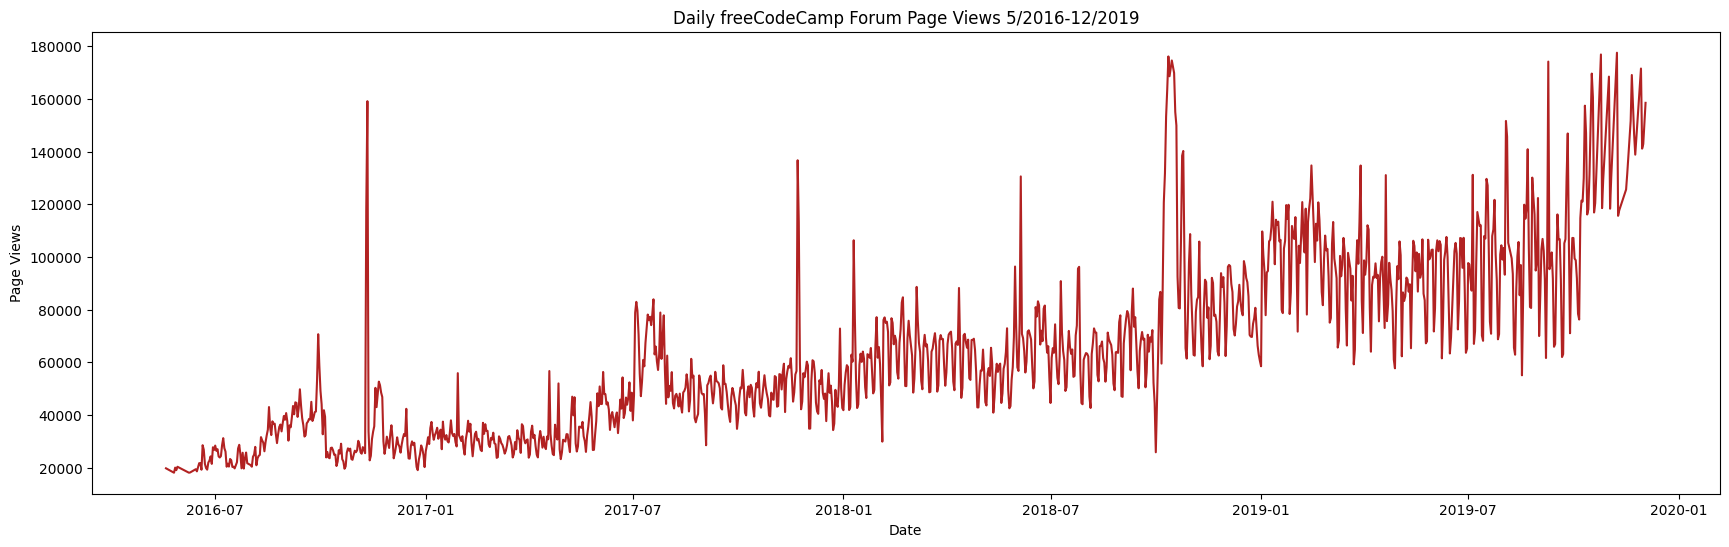

In [5]:
fig, axes = plt.subplots(figsize=(21, 6))

axes.plot(df, color="firebrick", linewidth=1.5)
axes.set_xlabel("Date")
axes.set_ylabel("Page Views")
axes.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

In [6]:
df_bar = df.copy() # need to do groupby() or resample() here probably (by month) - ***maybe I can just use sns.catplot()***
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [14]:
# resample or groupby first
df_yearly = df_bar.resample("ME").sum()

# fig = sns.catplot(df_bar, kind="bar", x="Year")
df_yearly

,value
date,
2016-05-31,97162
2016-06-30,415627
2016-07-31,675071
2016-08-31,962525
2016-09-30,1244306
2016-10-31,849348
2016-11-30,1213459
2016-12-31,862805
2017-01-31,1016340


TypeError: Axes.bar() missing 1 required positional argument: 'height'

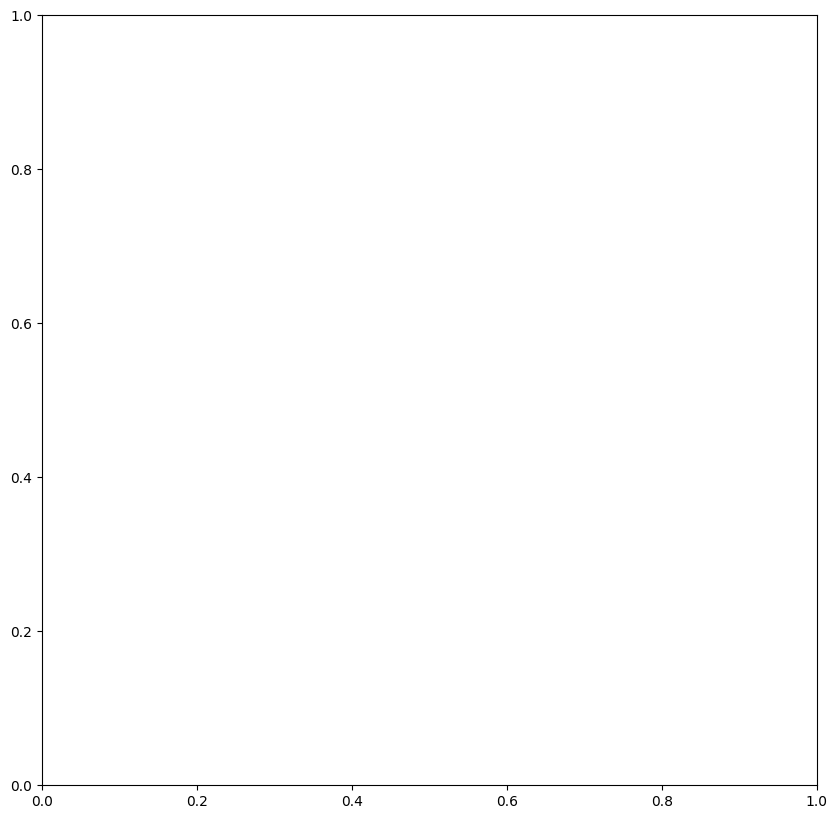

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.bar(df_bar, barwidth=0.5)